# Gender Recognition via Voice
## Team Skepsis
### Members - Sagnik Mitra, Sneharup Mukherjee, Spandan Pal

## Algorithm used to Analyze the Data and Determining which will work the best for preparing the Model

* K-Nearest Neighbors  
* Naive Bayes  
* Decision Tree  
* Random Forest  
* XgBoost  
* Support Vector Machine  
* Neural Network

In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import warnings
warnings.filterwarnings('ignore')
# read file
voice=pd.read_csv('voice.csv')
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [58]:
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0


In [4]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


Preprocessing: label encoder and normalization

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice["label"] = le.fit_transform(voice["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [6]:
voice[:]=preprocessing.MinMaxScaler().fit_transform(voice)
voice

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.436911,0.684871,0.570361,0.198513,0.686256,0.577704,0.046854,0.003489,0.921665,0.901057,...,0.436911,0.698762,0.380813,0.904450,0.279703,0.006452,0.192280,0.192418,0.173674,0.0
3164,0.362946,0.731172,0.262871,0.171937,0.702595,0.621185,0.015961,0.000333,0.912549,0.834545,...,0.362946,0.732760,0.126776,0.981526,0.305791,0.075269,0.167977,0.166667,0.298053,0.0
3165,0.484949,0.799042,0.690337,0.134329,0.786967,0.742124,0.050161,0.003469,0.855587,0.765849,...,0.484949,0.847759,0.153011,0.981526,0.164908,0.006452,0.134024,0.134120,0.208885,0.0
3166,0.492516,0.745692,0.695311,0.175136,0.767804,0.681107,0.041908,0.002539,0.870307,0.792241,...,0.492516,0.641561,0.127158,0.834600,0.265621,0.006452,0.164046,0.164163,0.333559,0.0


Visualization

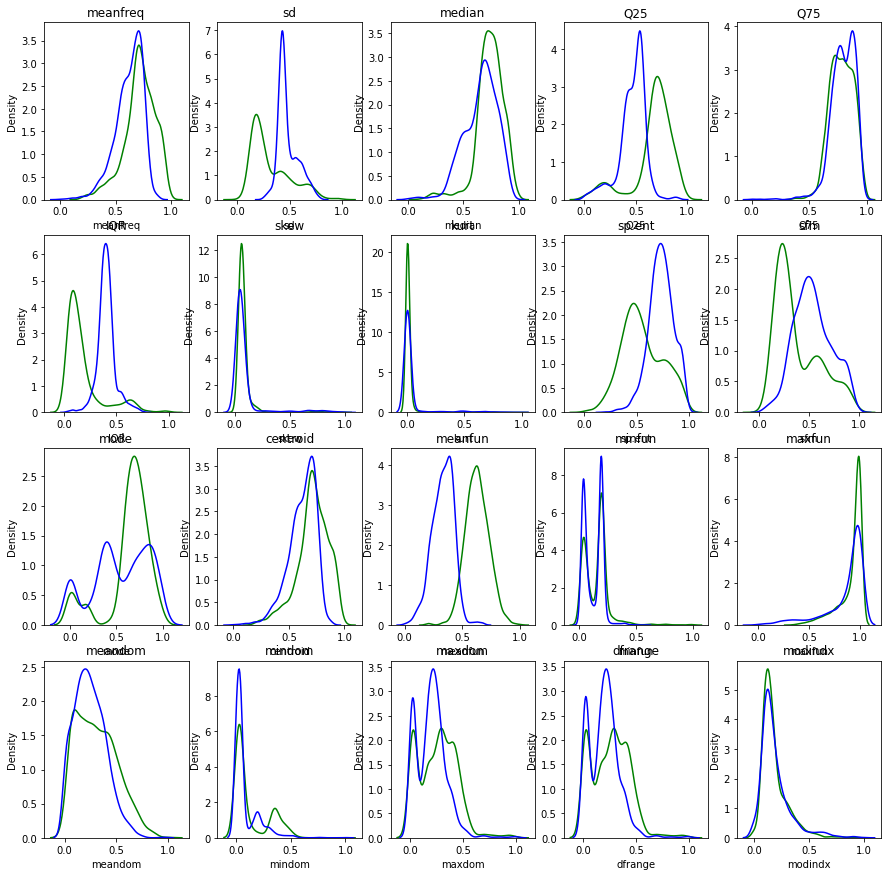

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(voice.columns[i-1])
    sns.kdeplot(voice.loc[voice['label'] == 0, voice.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(voice.loc[voice['label'] == 1, voice.columns[i-1]], color= 'blue', label='M')

At first glance, most significant features are Q25, IQR and meanfun. We will build models by using the 20 features and the 3 distinct features.

Using K-Nearest Neighbors, Naive Bayes, Decision Tree, Random Forest, XgBoost, Support Vector Machine, Neural Network to build models

In [8]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import accuracy_score

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
import xgboost

In [9]:
# Split the data
train, test = train_test_split(voice, test_size=0.3)

In [10]:
train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
2286,0.815881,0.146895,0.819549,0.792217,0.813745,0.084049,0.061120,0.004446,0.397604,0.199675,...,0.815881,0.647385,0.204891,0.864819,0.166604,0.040860,0.167977,0.167382,0.066002,0.0
1487,0.571628,0.470309,0.607912,0.420269,0.727649,0.387279,0.073963,0.008494,0.716140,0.514373,...,0.571628,0.212610,0.035200,0.712861,0.144339,0.006452,0.232309,0.232475,0.099180,1.0
2817,0.903641,0.181155,0.907734,0.886214,0.887729,0.058074,0.066196,0.005272,0.331844,0.187600,...,0.903641,0.759461,0.202799,0.999749,0.541224,0.040860,0.441387,0.440987,0.153457,0.0
535,0.502043,0.500936,0.537017,0.471345,0.563034,0.174506,0.051658,0.003703,0.808468,0.654374,...,0.502043,0.358956,0.030819,0.579677,0.119603,0.040860,0.228377,0.227825,0.067349,1.0
2084,0.676279,0.122385,0.687980,0.686692,0.667590,0.052008,0.069986,0.005922,0.386385,0.206634,...,0.676279,0.604617,0.032533,0.954963,0.306669,0.006452,0.295568,0.295780,0.215979,0.0


In [11]:
x_train = train.iloc[:, :-1]
y_train = train["label"]
x_test = test.iloc[:, :-1]
y_test = test["label"]

In [12]:
x_train3 = train[["meanfun","IQR","Q25"]]
y_train3 = train["label"]
x_test3 = test[["meanfun","IQR","Q25"]]
y_test3 = test["label"]

In [13]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['female', 'male']
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))
    a = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:",a)
    return a
    
    

In [14]:
 
accli=pd.read_csv('Accuracy_List.csv')
accli.set_index("Algorithm", inplace = True)
accli.at['K-Nearest Neighbours', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['K-Nearest Neighbours', 'Accuracy (considering all attributes)'] = 0
accli.at['Naïve Bayes', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['Naïve Bayes', 'Accuracy (considering all attributes)'] = 0
accli.at['Decision Tree', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['Decision Tree', 'Accuracy (considering all attributes)'] = 0
accli.at['Random Forest', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['Random Forest', 'Accuracy (considering all attributes)'] = 0
accli.at['XgBoost', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['XgBoost', 'Accuracy (considering all attributes)'] = 0
accli.at['Support Vector Machine', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['Support Vector Machine', 'Accuracy (considering all attributes)'] = 0
accli.at['Neural Network (MLP Classifier)', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['Neural Network (MLP Classifier)', 'Accuracy (considering all attributes)'] = 0

accli


,"Accuracy (considering only IQR, meanfun & Q25)",Accuracy (considering all attributes)
Algorithm,,
K-Nearest Neighbours,0.0,0.0
Naïve Bayes,0.0,0.0
Decision Tree,0.0,0.0
Random Forest,0.0,0.0
XgBoost,0.0,0.0
Support Vector Machine,0.0,0.0
Neural Network (MLP Classifier),0.0,0.0


In [15]:
list = accli.index
list

Index(['K-Nearest Neighbours', 'Naïve Bayes', 'Decision Tree', 'Random Forest',
       'XgBoost', 'Support Vector Machine', 'Neural Network (MLP Classifier)'],
      dtype='object', name='Algorithm')

## K-Nearest Neighbors
Using neighbors.KNeighborsClassifier() to build the model.

In [16]:
def knn_error(k,x_train,y_train,x_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]

Lowest error is 0.014721345951629864 occurs at k=4.


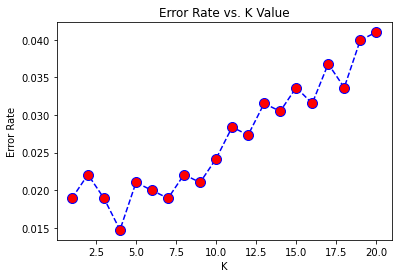

In [17]:
k=knn_error(21,x_train,y_train,x_test,y_test)

In [18]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
t = classify(model,x_train,y_train,x_test,y_test)
accli.at['K-Nearest Neighbours', 'Accuracy (considering all attributes)'] = t

              precision    recall  f1-score   support

      female     0.9939    0.9781    0.9859       502
        male     0.9759    0.9933    0.9845       449

    accuracy                         0.9853       951
   macro avg     0.9849    0.9857    0.9852       951
weighted avg     0.9854    0.9853    0.9853       951

Accuracy: 0.9852786540483701


Lowest error is 0.022082018927444796 occurs at k=5.


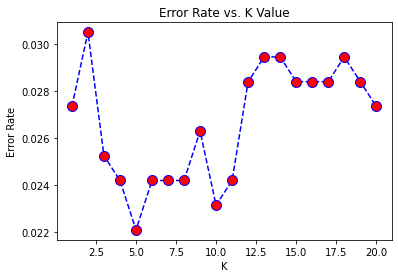

In [19]:
k=knn_error(21,x_train3,y_train3,x_test3,y_test3)

In [20]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
t = classify(model,x_train3,y_train3,x_test3,y_test3)
accli.at['K-Nearest Neighbours', 'Accuracy (considering only IQR, meanfun & Q25)'] = t

              precision    recall  f1-score   support

      female     0.9878    0.9701    0.9789       502
        male     0.9672    0.9866    0.9768       449

    accuracy                         0.9779       951
   macro avg     0.9775    0.9784    0.9779       951
weighted avg     0.9781    0.9779    0.9779       951

Accuracy: 0.9779179810725552


## Naive Bayes
Using naive_bayes.GaussianNB() to build the model.

In [21]:
model=naive_bayes.GaussianNB()
t = classify(model,x_train,y_train,x_test,y_test)
accli.at['Naïve Bayes', 'Accuracy (considering all attributes)'] = t

              precision    recall  f1-score   support

      female     0.9059    0.8825    0.8940       502
        male     0.8723    0.8976    0.8847       449

    accuracy                         0.8896       951
   macro avg     0.8891    0.8900    0.8894       951
weighted avg     0.8900    0.8896    0.8897       951

Accuracy: 0.889589905362776


In [22]:
model=naive_bayes.GaussianNB()
t = classify(model,x_train3,y_train3,x_test3,y_test3)
accli.at['Naïve Bayes', 'Accuracy (considering only IQR, meanfun & Q25)'] = t

              precision    recall  f1-score   support

      female     0.9877    0.9562    0.9717       502
        male     0.9527    0.9866    0.9694       449

    accuracy                         0.9706       951
   macro avg     0.9702    0.9714    0.9705       951
weighted avg     0.9711    0.9706    0.9706       951

Accuracy: 0.9705573080967402


## Decision Tree
Using tree.DecisionTreeClassifier() to build the model.

In [23]:
#Find the best parameter to prune the tree
def dt_error(n,x_train,y_train,x_test,y_test):
    nodes = range(2, n)
    error_rate = []
    for k in nodes:
        model = tree.DecisionTreeClassifier(max_leaf_nodes=k)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[kloc], nodes[kloc]))
    plt.plot(nodes, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.xlabel('Tree Size')
    plt.ylabel('Cross-Validated MSE')
    plt.show()
    return nodes[kloc]

Lowest error is 0.031545741324921134 occurs at n=6.


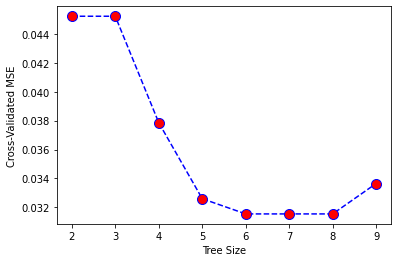

In [24]:
n=dt_error(10,x_train,y_train,x_test,y_test)

In [25]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
t = classify(pruned_tree,x_train,y_train,x_test,y_test)
accli.at['Decision Tree', 'Accuracy (considering all attributes)'] = t

              precision    recall  f1-score   support

      female     0.9609    0.9801    0.9704       502
        male     0.9772    0.9555    0.9662       449

    accuracy                         0.9685       951
   macro avg     0.9691    0.9678    0.9683       951
weighted avg     0.9686    0.9685    0.9684       951

Accuracy: 0.9684542586750788


Lowest error is 0.028391167192429023 occurs at n=13.


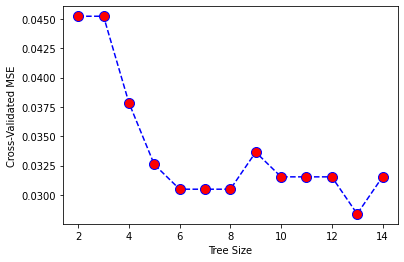

In [26]:
n=dt_error(15,x_train3,y_train3,x_test3,y_test3)

In [27]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
t = classify(pruned_tree,x_train3,y_train3,x_test3,y_test3)
accli.at['Decision Tree', 'Accuracy (considering only IQR, meanfun & Q25)'] = t

              precision    recall  f1-score   support

      female     0.9760    0.9701    0.9730       502
        male     0.9668    0.9733    0.9700       449

    accuracy                         0.9716       951
   macro avg     0.9714    0.9717    0.9715       951
weighted avg     0.9716    0.9716    0.9716       951

Accuracy: 0.9716088328075709


## Random Forest
Using ensemble.RandomForestClassifier() to build the model.

In [28]:
def rf_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model = ensemble.RandomForestClassifier(n_estimators = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

Lowest error is 0.011566771819137749 occurs at n=61.


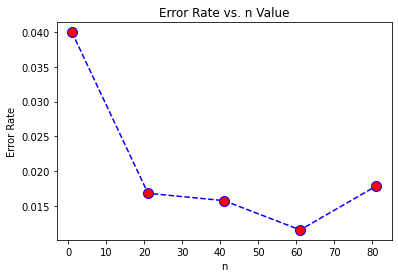

In [29]:
e=rf_error(100,x_train,y_train,x_test,y_test)

In [30]:
model=ensemble.RandomForestClassifier(n_estimators = e)
t = classify(model,x_train,y_train,x_test,y_test)
accli.at['Random Forest', 'Accuracy (considering all attributes)'] = t

              precision    recall  f1-score   support

      female     0.9959    0.9761    0.9859       502
        male     0.9739    0.9955    0.9846       449

    accuracy                         0.9853       951
   macro avg     0.9849    0.9858    0.9852       951
weighted avg     0.9855    0.9853    0.9853       951

Accuracy: 0.9852786540483701


Lowest error is 0.02103049421661409 occurs at n=41.


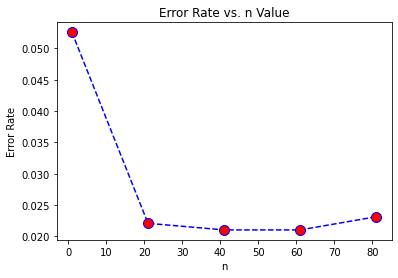

In [31]:
e=rf_error(100,x_train3,y_train3,x_test3,y_test3)

In [32]:
model=ensemble.RandomForestClassifier(n_estimators = e)
t = classify(model,x_train3,y_train3,x_test3,y_test3)
accli.at['Random Forest', 'Accuracy (considering only IQR, meanfun & Q25)'] = t

              precision    recall  f1-score   support

      female     0.9879    0.9721    0.9799       502
        male     0.9694    0.9866    0.9779       449

    accuracy                         0.9790       951
   macro avg     0.9786    0.9794    0.9789       951
weighted avg     0.9791    0.9790    0.9790       951

Accuracy: 0.9789695057833859


## XgBoost
Using xgboost.XGBClassifier() to build the model.

In [33]:
model = xgboost.XGBClassifier()
t = classify(model,x_train,y_train,x_test,y_test)
accli.at['XgBoost', 'Accuracy (considering all attributes)'] = t

[04:29:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

      female     0.9939    0.9801    0.9870       502
        male     0.9781    0.9933    0.9856       449

    accuracy                         0.9863       951
   macro avg     0.9860    0.9867    0.9863       951
weighted avg     0.9864    0.9863    0.9863       951

Accuracy: 0.9863301787592008


In [34]:
model = xgboost.XGBClassifier()
t = classify(model,x_train3,y_train3,x_test3,y_test3)
accli.at['XgBoost', 'Accuracy (considering only IQR, meanfun & Q25)'] = t

[04:29:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

      female     0.9760    0.9701    0.9730       502
        male     0.9668    0.9733    0.9700       449

    accuracy                         0.9716       951
   macro avg     0.9714    0.9717    0.9715       951
weighted avg     0.9716    0.9716    0.9716       951

Accuracy: 0.9716088328075709


## Support Vector Machine
Using svm.SVC() to build the model.

In [35]:
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        model=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print(i, ' in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        y_pred=model.predict(x_test)
        print(i, ' out-of-sample accuracy in SVM: ', accuracy_score(y_test,y_pred))
        rate.append(accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [36]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C=range(1,C)
    for i in C:
        model=svm.SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [37]:
k=svm_kernel(x_train,y_train,x_test,y_test)

rbf  in-sample accuracy in SVM:  0.9788001804239964
rbf  out-of-sample accuracy in SVM:  0.9747634069400631
poly  in-sample accuracy in SVM:  0.9806044203879116
poly  out-of-sample accuracy in SVM:  0.982124079915878
linear  in-sample accuracy in SVM:  0.9738385205232296
linear  out-of-sample accuracy in SVM:  0.9695057833859095
Highest accuracy is 0.982124079915878 occurs at poly kernel.


Lowest error is 0.017875920084121977 occurs at C=1.


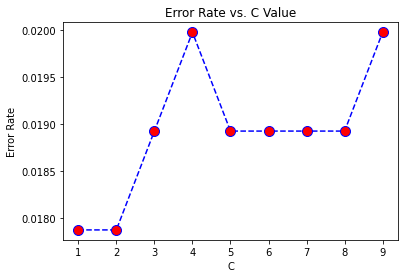

In [38]:
c=svm_error(k,10,x_train,y_train,x_test,y_test)

In [39]:
model=svm.SVC(kernel=k,C=c)
t = classify(model,x_train,y_train,x_test,y_test)
accli.at['Support Vector Machine', 'Accuracy (considering all attributes)'] = t

              precision    recall  f1-score   support

      female     0.9939    0.9721    0.9829       502
        male     0.9696    0.9933    0.9813       449

    accuracy                         0.9821       951
   macro avg     0.9817    0.9827    0.9821       951
weighted avg     0.9824    0.9821    0.9821       951

Accuracy: 0.982124079915878


In [40]:
k=svm_kernel(x_train3,y_train3,x_test3,y_test3)

rbf  in-sample accuracy in SVM:  0.9720342805593144
rbf  out-of-sample accuracy in SVM:  0.9716088328075709
poly  in-sample accuracy in SVM:  0.9697789806044204
poly  out-of-sample accuracy in SVM:  0.9705573080967402
linear  in-sample accuracy in SVM:  0.9666215606675688
linear  out-of-sample accuracy in SVM:  0.9674027339642481
Highest accuracy is 0.9716088328075709 occurs at rbf kernel.


Lowest error is 0.019978969505783387 occurs at C=8.


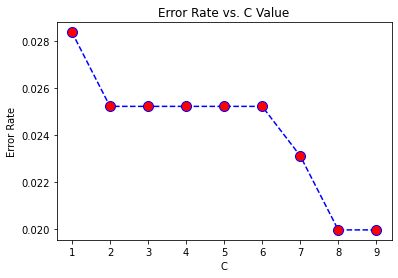

In [41]:
c=svm_error(k,10,x_train3,y_train3,x_test3,y_test3)

In [42]:
model=svm.SVC(kernel=k,C=c)
t = classify(model,x_train3,y_train3,x_test3,y_test3)
accli.at['Support Vector Machine', 'Accuracy (considering only IQR, meanfun & Q25)'] = t


              precision    recall  f1-score   support

      female     0.9859    0.9761    0.9810       502
        male     0.9736    0.9844    0.9790       449

    accuracy                         0.9800       951
   macro avg     0.9797    0.9803    0.9800       951
weighted avg     0.9801    0.9800    0.9800       951

Accuracy: 0.9800210304942166


## Neural Network
Using neural_network.MLPClassifier to build the model.

In [43]:
def nn_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=range(1,n)
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=i,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Error Rate')
    plt.show()
    return hidden_layer[kloc]

Lowest error is 0.031545741324921134 occurs at C=7.


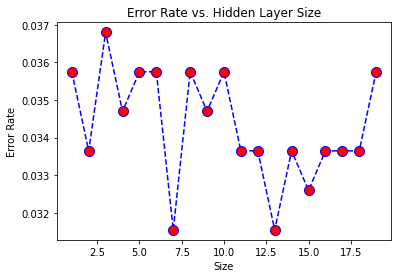

In [44]:
h=nn_error(20,x_train,y_train,x_test,y_test)

In [45]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
t = classify(model,x_train,y_train,x_test,y_test)
accli.at['Neural Network (MLP Classifier)', 'Accuracy (considering all attributes)'] = t

              precision    recall  f1-score   support

      female     0.9856    0.9542    0.9696       502
        male     0.9505    0.9844    0.9672       449

    accuracy                         0.9685       951
   macro avg     0.9681    0.9693    0.9684       951
weighted avg     0.9690    0.9685    0.9685       951

Accuracy: 0.9684542586750788


Lowest error is 0.028391167192429023 occurs at C=4.


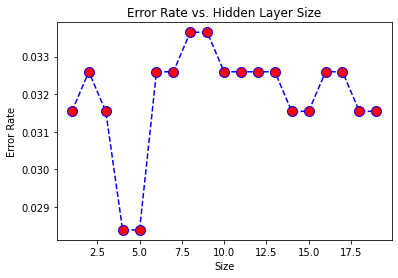

In [46]:
h=nn_error(20,x_train3,y_train3,x_test3,y_test3)

In [47]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
t = classify(model,x_train3,y_train3,x_test3,y_test3)
accli.at['Neural Network (MLP Classifier)', 'Accuracy (considering only IQR, meanfun & Q25)'] = t

              precision    recall  f1-score   support

      female     0.9917    0.9542    0.9726       502
        male     0.9509    0.9911    0.9706       449

    accuracy                         0.9716       951
   macro avg     0.9713    0.9726    0.9716       951
weighted avg     0.9724    0.9716    0.9716       951

Accuracy: 0.9716088328075709


In [48]:
accli

,"Accuracy (considering only IQR, meanfun & Q25)",Accuracy (considering all attributes)
Algorithm,,
K-Nearest Neighbours,0.977918,0.985279
Naïve Bayes,0.970557,0.889590
Decision Tree,0.971609,0.968454
Random Forest,0.978970,0.985279
XgBoost,0.971609,0.986330
Support Vector Machine,0.980021,0.982124
Neural Network (MLP Classifier),0.971609,0.968454


In [49]:
print(accli.index)

Index(['K-Nearest Neighbours', 'Naïve Bayes', 'Decision Tree', 'Random Forest',
       'XgBoost', 'Support Vector Machine', 'Neural Network (MLP Classifier)'],
      dtype='object', name='Algorithm')


In [51]:
min_max_scaler = preprocessing.MinMaxScaler()

In [55]:
accli[["Accuracy (considering only IQR, meanfun & Q25)", "Accuracy (considering all attributes)"]] = min_max_scaler.fit_transform(accli[["Accuracy (considering only IQR, meanfun & Q25)", "Accuracy (considering all attributes)"]])

<AxesSubplot:xlabel='Algorithm'>

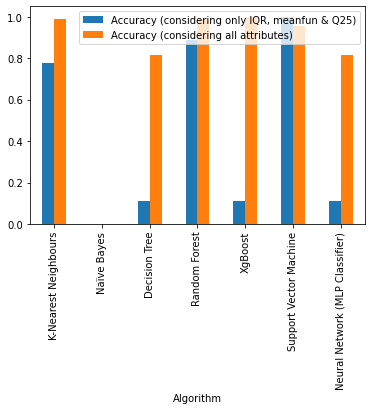

In [56]:
accli.plot.bar()